In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
size = 5

alp_arr = [0,1,5,20]
gam = np.linspace(0,0.8,5)
gam_arr = gam.tolist()  # NumPy 배열을 Python 리스트로 변환

gam_arr[0] = int(gam_arr[0])
gam_arr[3] = 0.6

In [39]:
gam_arr

[0, 0.2, 0.4, 0.6, 0.8]

In [34]:
def read_matrix_from_file(filename,size):
    with open(filename, 'r') as f:
        data = f.read().split()
    return np.array([float(x) for x in data]).reshape(size, size)

def calculate_expectation_value(density_matrix, operator_matrix):
    return np.trace(np.dot(density_matrix, operator_matrix))

In [40]:
for i in range(len(alp_arr)):
    globals()['EXPEC_ALP{}'.format(alp_arr[i])]=[]
    for j in range(len(gam_arr)):
        density_matrix = read_matrix_from_file('OCA_PROP_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_1_GRID_201_SIZE_5.txt'.format(gam_arr[j],alp_arr[i]),size)
        operator_matrix = read_matrix_from_file('OCA_COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_BETA_1_GRID_201_SIZE_5.txt'.format(gam_arr[j],alp_arr[i]),size)

        expectation_value = calculate_expectation_value(density_matrix, operator_matrix)

        globals()['EXPEC_ALP{}'.format(alp_arr[i])].append(expectation_value)

In [41]:
EXPEC_ALP0

[0.0,
 0.08433073812157,
 0.166576240378366,
 0.24487417961106803,
 0.317758673591222]

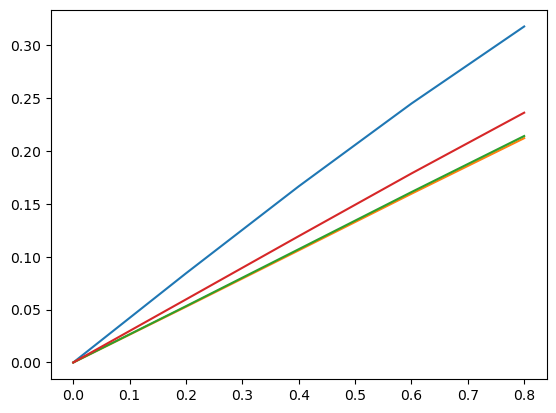

In [44]:
plt.plot(gam_arr,EXPEC_ALP0)
plt.plot(gam_arr,EXPEC_ALP1)
plt.plot(gam_arr,EXPEC_ALP5)
plt.plot(gam_arr,EXPEC_ALP20)